In [1]:
import sys

from matplotlib import pyplot as plt

sys.path.append("..")
import datetime
import pandas as pd
import time
import os
import pickle
from DataProcessing.DataGrouper import *

RAW FILES ANALYSES

In [4]:
root_path = "../Data/2018tweets/volume/2018(03-08--03-11).csv"
try:
    data = pd.read_csv(root_path, sep=";")
except:
    data = pd.read_csv(root_path, lineterminator="\n")

C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (13,14,15,22,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.shape

(7167483, 29)

In [7]:
grouped = group_volumedata(data,"D")

NameError: name 'plt' is not defined

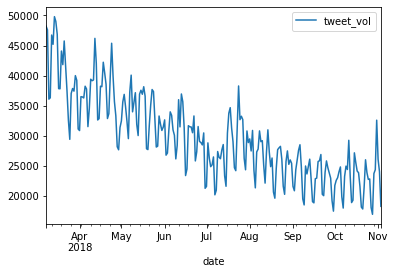

In [12]:
plt.close()
grouped.plot(x='date')
plt.show()
grouped.to_csv("../Data/Graphs/Volume_Raw_Daily.csv")

In [13]:
grouped = None
data = None

WEIGHTED FILES ANALYSES

In [5]:
root_path = "../Data/2018-Weighted/unprocessed/"
files = [
        "03 2018",
        "04 2018", "05 2018",
        "06 2018",
        "07 2018", "08 2018",
        "09 2018", "10 2018", "11 2018"
    ]

t0 = time.time()
chunk_list = []
for file in files:
    print(file)
    try:
        data = pd.read_csv(root_path + file + ".csv", sep=";")
    except:
        data = pd.read_csv(root_path + file + ".csv", lineterminator="\n")

    chunk_list.append(data)

03 2018
shape (722638, 22)  time:  5.195425748825073
04 2018
shape (821560, 22)  time:  11.105324506759644
05 2018
shape (758463, 22)  time:  17.148667097091675
06 2018
shape (619253, 22)  time:  22.458291053771973
07 2018
shape (593261, 22)  time:  27.86942720413208
08 2018
shape (575358, 22)  time:  32.83892369270325
09 2018
shape (492858, 22)  time:  36.274271726608276
10 2018
shape (527950, 22)  time:  39.980292081832886
11 2018
shape (47161, 22)  time:  40.35628795623779


In [6]:
data = pd.concat(chunk_list)



(5158502, 22)

In [7]:
grouped = group_volumedata(data,"D")

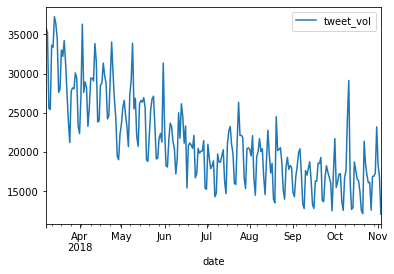

In [8]:
plt.close()
grouped.plot(x='date')
plt.show()
grouped.to_csv("../Data/Graphs/Volume_Raw_Daily_weighted.csv")

ENGLISH only

In [10]:
data = pd.concat(chunk_list)


In [11]:
data = data.loc[data['api_lang'] == "en"]
data.shape

(5140660, 22)

In [14]:
grouped = group_volumedata(data,"D")

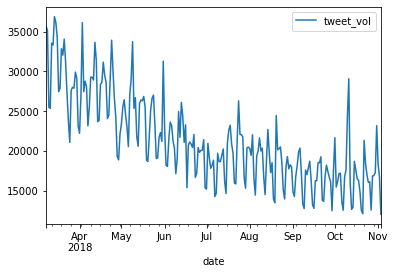

In [15]:
plt.close()
grouped.plot(x='date')
plt.show()
grouped.to_csv("../Data/Graphs/Volume_Raw_Daily_weighted_english.csv")

BOTS

In [2]:

root_path = "../Data/2018-Weighted/classed/"
files = [
        "03 2018",
        "04 2018", "05 2018",
        "06 2018",
        "07 2018", "08 2018",
        "09 2018", "10 2018", "11 2018"
    ]

t0 = time.time()
chunk_list = []
for file in files:
    print(file)
    try:
        data = pd.read_csv(root_path + file + ".csv", sep=";")
    except:
        data = pd.read_csv(root_path + file + ".csv", lineterminator="\n")

    chunk_list.append(data)

03 2018
04 2018


C:\ProgramData\Anaconda3\envs\tensorflow1\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (26,30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


05 2018
06 2018
07 2018
08 2018
09 2018
10 2018
11 2018


In [3]:
data = pd.concat(chunk_list)

In [4]:
bots = data.loc[data['bot'] == 1]
bots.shape

(321603, 31)

In [5]:
no_bots = data.loc[data['bot'] == 0]
no_bots.shape

(4066284, 31)

In [10]:
fields = ["like_count","possibly_sensitive","quote_count","reply_count","retweet_count",
          "user_followers_count","user_following_count","user_listed_count",
          "user_tweet_count","user_verified",
          "sent_neg","sent_neu","sent_pos","sent_compound",
          ]

new_columns = [i.strip() for i in bots.columns]
bots.columns = new_columns

new_columns = [i.strip() for i in no_bots.columns]
no_bots.columns = new_columns

bots_desc = bots[fields].describe()
print(bots_desc)

no_bots_desc = no_bots[fields].describe()
print(no_bots_desc)



          like_count  possibly_sensitive    quote_count    reply_count  \
count  321603.000000       321603.000000  321603.000000  321603.000000   
mean        1.019959            0.003980       0.053753       0.126056   
std        25.460324            0.062962       2.061685       3.128930   
min         0.000000            0.000000       0.000000       0.000000   
25%         0.000000            0.000000       0.000000       0.000000   
50%         0.000000            0.000000       0.000000       0.000000   
75%         0.000000            0.000000       0.000000       0.000000   
max      7068.000000            1.000000     489.000000     613.000000   

       retweet_count  user_followers_count  user_following_count  \
count  321603.000000          3.216030e+05          3.216030e+05   
mean        0.404570          1.222041e+04          4.571811e+03   
std         9.510024          1.992363e+05          2.418948e+04   
min         0.000000          0.000000e+00          0.000000e